<a href="https://colab.research.google.com/github/internshipkrishna/image-segmentation-system/blob/main/image_segentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle (3).json to kaggle (3) (1).json


{'kaggle (3) (1).json': b'{"username":"krishnapriyabishi","key":"48934707cfa484f364654b0e2c2815ee"}'}

In [ ]:
#Install kagglehub and download dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aletbm/aerial-imagery-dataset-floodnet-challenge")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1


In [ ]:
#Unzip any ZIP files
import zipfile

latest_path = sorted(os.listdir(path))[-1]
dataset_path = os.path.join(path, latest_path)

for item in os.listdir(dataset_path):
    if item.endswith(".zip"):
        with zipfile.ZipFile(os.path.join(dataset_path, item), 'r') as zip_ref:
            zip_ref.extractall(dataset_path)

print("Dataset ready at:", dataset_path)


Dataset ready at: /root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 2


In [ ]:
import os

# Check the root dataset folder
print("Dataset base path:", dataset_path)

# List all folders/files inside it
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")

Dataset base path: /root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 2
FloodNet Challenge - Track 2/
    Questions/
        Training Question.json
        Valid Question.json
        Test_Question.json
    Images/
        Train_Image/
            6890.JPG
            7735.JPG
            6929.JPG
            8101.JPG
            7977.JPG
            7125.JPG
            7974.JPG
            6993.JPG
            8479.JPG
            7189.JPG
            9351.JPG
            7725.JPG
            9278.JPG
            6430.JPG
            8431.JPG
            7071.JPG
            7185.JPG
            9346.JPG
            6933.JPG
            7641.JPG
            8408.JPG
            7018.JPG
            8153.JPG
            6976.JPG
            6347.JPG
            7789.JPG
            6901.JPG
            7022.JPG
            8442.JPG
            7247.JPG
            8597.JPG
            9511.JPG
            7331.JPG
   

In [ ]:
!pip install -q albumentations segmentation-models-pytorch opencv-python matplotlib
!pip install -q kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
import os
from glob import glob

BASE_PATH = "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1"

# Images from Track 2 (Train + Valid)
image_train_paths = sorted(glob(os.path.join(BASE_PATH, "FloodNet Challenge - Track 2", "Images", "Train_Image", "*.JPG")))
image_valid_paths = sorted(glob(os.path.join(BASE_PATH, "FloodNet Challenge - Track 2", "Images", "Valid_Image", "*.JPG")))

print(f"Train images found (Track 2): {len(image_train_paths)}")
print(f"Valid images found (Track 2): {len(image_valid_paths)}")

# Masks from Track 1 (Train/Labeled/Flooded/mask)
import os
from glob import glob

BASE_PATH = "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1"

# Images from Track 2 (Train + Valid)
image_train_paths = sorted(glob(os.path.join(BASE_PATH, "FloodNet Challenge - Track 2", "Images", "Train_Image", "*.JPG")))
image_valid_paths = sorted(glob(os.path.join(BASE_PATH, "FloodNet Challenge - Track 2", "Images", "Valid_Image", "*.JPG")))

print(f"Train images found (Track 2): {len(image_train_paths)}")
print(f"Valid images found (Track 2): {len(image_valid_paths)}")

# Masks from Track 1 (Train/Labeled/Flooded/mask)
mask_paths = sorted(glob(os.path.join(BASE_PATH, "FloodNet Challenge - Track 1", "Train", "Labeled", "Flooded", "mask", "*.png")))

print(f"Masks found (Track 1): {len(mask_paths)}")

Train images found (Track 2): 1448
Valid images found (Track 2): 450
Train images found (Track 2): 1448
Valid images found (Track 2): 450
Masks found (Track 1): 51


In [ ]:
image_dir = os.path.join(dataset_path, 'FloodNet Challenge - Track 2', 'images')
mask_dir = os.path.join(dataset_path, 'FloodNet Challenge - Track 2', 'masks')

In [ ]:
from glob import glob
import os

image_train_paths = sorted(glob(os.path.join(BASE_PATH, "FloodNet Challenge - Track 2", "Images", "Train_Image", "*.JPG")))
from glob import glob
import os

image_train_paths = sorted(glob(os.path.join(BASE_PATH, "FloodNet Challenge - Track 2", "Images", "Train_Image", "*.JPG")))
print("Track 2 image sample filenames:")
for p in image_train_paths[:5]:
    print(os.path.basename(p))

Track 2 image sample filenames:
10165.JPG
10166.JPG
10168.JPG
10170.JPG
10171.JPG


In [ ]:
mask_paths = sorted(glob(os.path.join(BASE_PATH, "FloodNet Challenge - Track 1", "Train", "Labeled", "Flooded", "mask", "*.png")))
print("\nTrack 1 mask sample filenames:")
for p in mask_paths[:5]:
    print(os.path.basename(p))


Track 1 mask sample filenames:
10165_lab.png
10166_lab.png
6279_lab.png
6614_lab.png
6615_lab.png


In [ ]:
# STEP 0: Install Dependencies
!pip install -q segmentation-models-pytorch albumentations opencv-python matplotlib

# STEP 1: Import Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

import albumentations as A
from albumentations.pytorch import ToTensorV2
import segmentation_models_pytorch as smp

In [ ]:
# STEP 2: Dataset Setup (Matching Image & Mask Paths)

BASE_PATH = "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1"

# Paths
image_train_paths = sorted(glob(os.path.join(BASE_PATH, "FloodNet Challenge - Track 2", "Images", "Train_Image", "*.JPG")))
mask_paths = sorted(glob(os.path.join(BASE_PATH, "FloodNet Challenge - Track 1", "Train", "Labeled", "Flooded", "mask", "*.png")))

# Match images to masks
mask_dict = {os.path.basename(p).replace("_lab.png", ""): p for p in mask_paths}
paired_images, paired_masks = [], []

for img_path in image_train_paths:
    img_id = os.path.splitext(os.path.basename(img_path))[0]
    if img_id in mask_dict:
        paired_images.append(img_path)
        paired_masks.append(mask_dict[img_id])

print(f"✅ Matched image-mask pairs: {len(paired_images)}")

✅ Matched image-mask pairs: 51


In [ ]:
from torch.utils.data import DataLoader, Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2 # Import OpenCV to read images
import numpy as np # Import numpy

# Define your custom Dataset class
class FloodNetDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]

        # Read image and mask. Make sure to read the mask in grayscale if it's single channel
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert BGR to RGB

        # Read mask as grayscale. Adjust this if your masks are not grayscale.
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']
            # Add an extra dimension to the mask if needed for compatibility with your model
            mask = mask.unsqueeze(0) # Example for adding channel dimension

        return image, mask

# Define your transformations here
transform = A.Compose([
    A.Resize(256, 256), # Example resize
    A.Normalize(),      # Example normalization
    ToTensorV2()        # Convert to PyTorch tensor
])

# Now FloodNetDataset is defined and can be used
train_dataset = FloodNetDataset(paired_images, paired_masks, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [ ]:
print(f"Total matched pairs: {len(paired_images)}")

Total matched pairs: 51


In [ ]:
# Extract image IDs from filenames
image_ids = [os.path.splitext(os.path.basename(p))[0] for p in image_train_paths]
print("📸 Image IDs (first 5):", image_ids[:5])

# Extract mask IDs from filenames (stripped "_lab")
mask_ids = [os.path.basename(p).replace("_lab.png", "") for p in mask_paths]
print("🎯 Mask IDs (first 5):", mask_ids[:5])

# Print number of overlaps
common_ids = set(image_ids).intersection(set(mask_ids))
print(f"🔁 Common IDs: {len(common_ids)}")

📸 Image IDs (first 5): ['10165', '10166', '10168', '10170', '10171']
🎯 Mask IDs (first 5): ['10165', '10166', '6279', '6614', '6615']
🔁 Common IDs: 51


In [ ]:
import os

image_train_dir = os.path.join(BASE_PATH, "FloodNet Challenge - Track 2", "Images", "Train_Image")
mask_dir = os.path.join(BASE_PATH, "FloodNet Challenge - Track 1", "Train", "Labeled", "Flooded", "mask")

image_train_paths = sorted(glob(os.path.join(image_train_dir, "*.JPG")))
mask_paths = sorted(glob(os.path.join(mask_dir, "*.png")))

print(f"🖼️ Found {len(image_train_paths)} training images")
print(f"🎯 Found {len(mask_paths)} masks")

🖼️ Found 1448 training images
🎯 Found 51 masks


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_size=(128, 128, 3)):
    inputs = tf.keras.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c3)

    # Decoder
    u4 = layers.UpSampling2D((2, 2))(c3)
    u4 = layers.concatenate([u4, c2])
    c4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u4)
    c4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c4)

    u5 = layers.UpSampling2D((2, 2))(c4)
    u5 = layers.concatenate([u5, c1])
    c5 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = unet_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      2,320 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      9,248 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     36,928 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 64, 64,    │          0 │ conv2d_5[0][0]    │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 96)               │            │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │     27,680 │ concatenate[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 64, 64,    │      9,248 │ conv2d_6[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 128, 128,  │          0 │ conv2d_7[0][0]    │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128, 128,  │          0 │ up_sampling2d_1[… │
│ (Concatenate)       │ 48)               │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 128, 128,  │      6,928 │ concatenate_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 128, 128,  │      2,320 │ conv2d_8[0][0]  

 Total params: 118,273 (462.00 KB)

 Trainable params: 118,273 (462.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from torch.utils.data import DataLoader, Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2 # Import OpenCV to read images
import numpy as np # Import numpy
import torch # Import torch

# Define your custom Dataset class
class FloodNetDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]

        # Read image and mask. Make sure to read the mask in grayscale if it's single channel
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert BGR to RGB

        # Read mask as grayscale. Adjust this if your masks are not grayscale.
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # --- Added debugging and potential mask resizing ---
        # Check if image and mask have the same dimensions before transforming
        if image.shape[:2] != mask.shape[:2]:
            print(f"Warning: Image and mask for index {idx} have different shapes:")
            print(f"  Image shape: {image.shape}")
            print(f"  Mask shape: {mask.shape}")
            # Resize mask to match image shape (Height, Width)
            # Note: This is a simple resize. More sophisticated methods might be needed
            # depending on how you want to handle masks (e.g., nearest neighbor for segmentation).
            mask = cv2.resize(mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
            print(f"  Mask resized to: {mask.shape}")
        # --- End of added code ---


        if self.transform:
            # Albumentations expects mask to be shape (H, W) or (H, W, C)
            # Since we loaded as grayscale, it's (H, W).
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']
            # Add an extra dimension to the mask if needed for compatibility with your model
            # Your model expects (batch, H, W, 1), so the DataLoader output should be (batch, 1, H, W)
            # mask is likely (H, W) after ToTensorV2. Let's unsqueeze.
            mask = mask.unsqueeze(0) # Add channel dimension (1, H, W)


        return image, mask

# Define your transformations here
transform = A.Compose([
    A.Resize(256, 256), # Example resize - This resizes both image and mask
    A.Normalize(),      # Example normalization
    ToTensorV2()        # Convert to PyTorch tensor
])

# Now FloodNetDataset is defined and can be used
train_dataset = FloodNetDataset(paired_images, paired_masks, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from glob import glob # Make sure glob is imported if not already

# Use the correctly identified paths from previous cells
# Assume image_train_paths and mask_paths are already defined and populated
# from matching image and mask filenames as done in previous cells.

# Example (re-running the path collection if needed, but ideally use the variables from earlier):
# Make sure BASE_PATH is defined or use the `path` variable from kagglehub download
# BASE_PATH = path # Use the path returned by kagglehub.dataset_download

# image_train_dir = os.path.join(BASE_PATH, "FloodNet Challenge - Track 2", "Images", "Train_Image")
# mask_dir = os.path.join(BASE_PATH, "FloodNet Challenge - Track 1", "Train", "Labeled", "Flooded", "mask")

# image_train_paths = sorted(glob(os.path.join(image_train_dir, "*.JPG")))
# mask_paths = sorted(glob(os.path.join(mask_dir, "*.png")))

# The following assumes paired_images and paired_masks are already populated from the matching step
# in the previous cells. If you want to load *all* training images and corresponding masks,
# you would iterate through the paired lists.

# If you intend to load images and masks from the *full* dataset based on the structure:
# This approach is safer as it iterates through the list of paths you've already verified exist.

images = []
masks = []

# Iterate through the paired image and mask paths you created earlier
# The variable `paired_images` and `paired_masks` from cell 55 are the correct ones to use.
# Ensure these variables are accessible in this cell's scope.

# Assuming `paired_images` and `paired_masks` are available from previous successful steps:
print(f"Loading {len(paired_images)} images and {len(paired_masks)} masks...")

for img_path, mask_path in zip(paired_images, paired_masks):
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if img is not None and mask is not None:
        # Resize to the desired input size for your model (128, 128)
        img = cv2.resize(img, (128, 128))
        # Resize mask using nearest neighbor interpolation for segmentation masks
        mask = cv2.resize(mask, (128, 128), interpolation=cv2.INTER_NEAREST)
        images.append(img)
        masks.append(mask)
    else:
        print(f"Warning: Could not load image {img_path} or mask {mask_path}")


X = np.array(images) / 255.0  # Normalize image data
y = np.expand_dims(np.array(masks), axis=-1) # Masks are typically 0/1 or integer labels. No need to normalize by 255.
# If your masks are binary (0 and 255), you might need to convert 255 to 1
# Example: y[y > 0] = 1 # Assuming non-zero pixels are the target class

print(f"Successfully loaded {len(images)} valid image/mask pairs.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Loading 51 images and 51 masks...
Successfully loaded 51 valid image/mask pairs.
X_train shape: (40, 128, 128, 3)
y_train shape: (40, 128, 128, 1)
X_test shape: (11, 128, 128, 3)
y_test shape: (11, 128, 128, 1)


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=16)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.0407 - loss: 0.7742 - val_accuracy: 0.2015 - val_loss: 0.0635
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1243 - loss: -0.6134 - val_accuracy: 0.2016 - val_loss: -4.3363
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.1177 - loss: -9.8093 - val_accuracy: 0.2016 - val_loss: -32.7524
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.1173 - loss: -67.9620 - val_accuracy: 0.2016 - val_loss: -200.7034
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1217 - loss: -400.1550 - val_accuracy: 0.2016 - val_loss: -1081.0540
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.1220 - loss: -2099.7168 - val_accuracy: 0.2016 - val_loss: -5326.0405
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.1122 - loss: -10020.2344 - val_accuracy: 0.2016 - val_loss: -23759.1875
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1178 - loss: -43912.5469 - val_accuracy: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


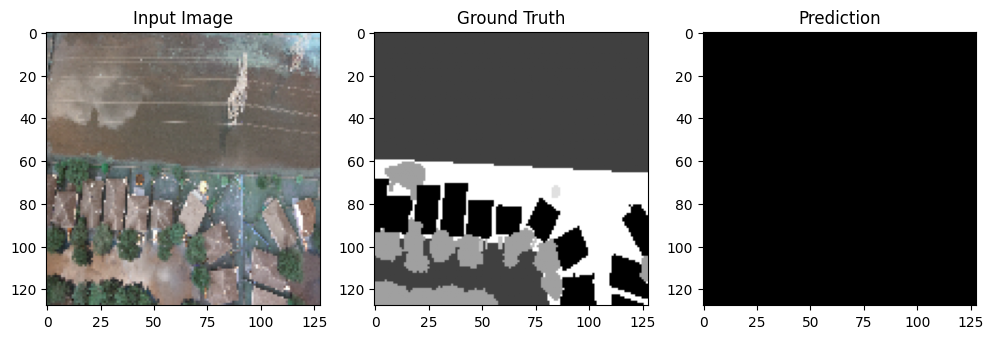

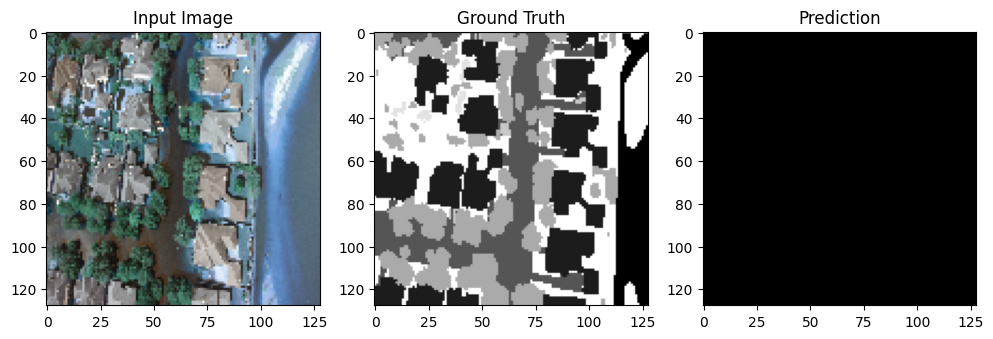

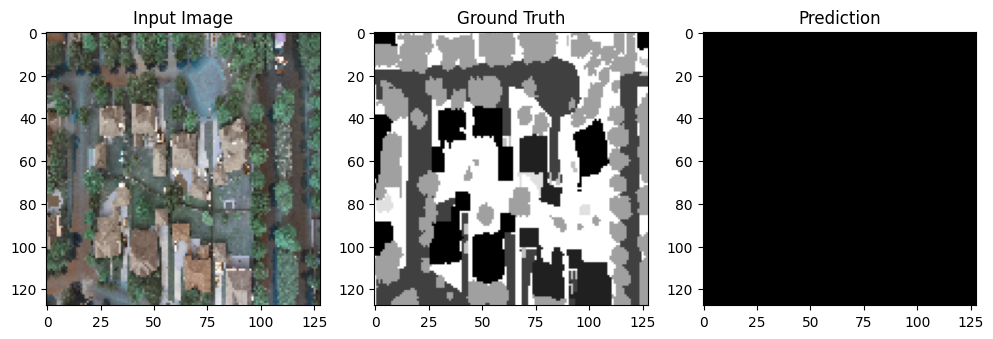

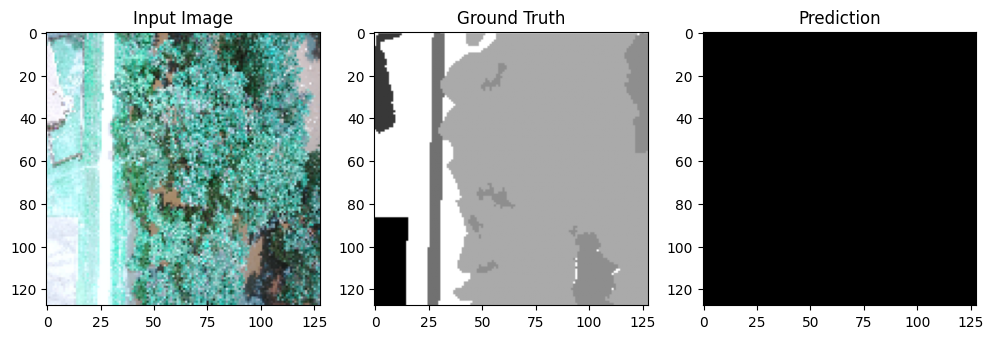

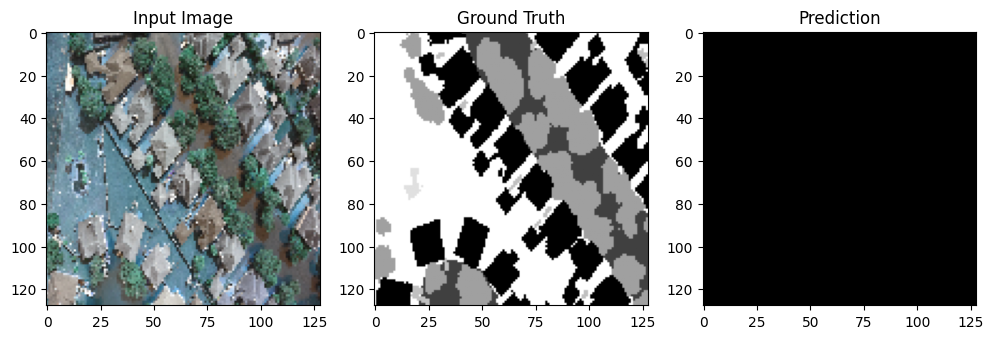

In [ ]:
preds = model.predict(X_test[:5])

for i in range(5):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(X_test[i])

    plt.subplot(1, 3, 2)
    plt.title("Ground Truth")
    plt.imshow(y_test[i].squeeze(), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Prediction")
    plt.imshow(preds[i].squeeze(), cmap='gray')
    plt.show()

In [ ]:
import numpy as np

# Count pixels of each class
flat_labels = np.argmax(y_train, axis=-1).flatten()
unique, counts = np.unique(flat_labels, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))

Class distribution: {np.int64(0): np.int64(11949), np.int64(1): np.int64(643411)}


In [ ]:
# Get pixel counts again
class_totals = np.array([11949, 643411])
total = np.sum(class_totals)
class_weights = total / (2 * class_totals)  # Inverse frequency
print("Calculated weights:", class_weights)

Calculated weights: [27.42321533  0.50928567]


In [ ]:
from tensorflow.keras import backend as K

def weighted_categorical_crossentropy(weights):
    weights = K.variable(weights)

    def loss(y_true, y_pred):
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        loss = y_true * K.log(y_pred) * weights
        return -K.sum(loss, -1)

    return loss

# Use computed weights
weights = [27.0, 0.5]  # Replace with actual values from above
loss_fn = weighted_categorical_crossentropy(weights)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=8)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5000 - loss: 1.1608e-07 - val_accuracy: 0.5000 - val_loss: 5.9605e-08
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 762ms/step - accuracy: 0.5000 - loss: 1.3547e-07 - val_accuracy: 0.5000 - val_loss: 5.9605e-08
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5000 - loss: 9.7409e-08 - val_accuracy: 0.5000 - val_loss: 5.9605e-08
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 754ms/step - accuracy: 0.5000 - loss: 1.2401e-07 - val_accuracy: 0.5000 - val_loss: 5.9605e-08
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5000 - loss: 9.9230e-08 - val_accuracy: 0.5000 - val_loss: 5.9605e-08
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 770ms/step - accuracy: 0.5000 - loss: 1.2330e-07 - val_accuracy: 0.5000 - val_loss: 5.9605e-08
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 749ms/step - accuracy: 0.5000 - loss: 1.2491e-07 - val_accuracy: 0.5000 - val_loss: 5.9605e-08
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 997ms/step - accuracy: 0.5000 -

In [ ]:
def iou_metric(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=-1)
    y_true = tf.argmax(y_true, axis=-1)

    intersection = tf.reduce_sum(tf.cast(y_true == y_pred, tf.float32))
    union = tf.reduce_sum(tf.cast(tf.math.logical_or(y_true > 0, y_pred > 0), tf.float32))

    return intersection / (union + 1e-10)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy', iou_metric])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


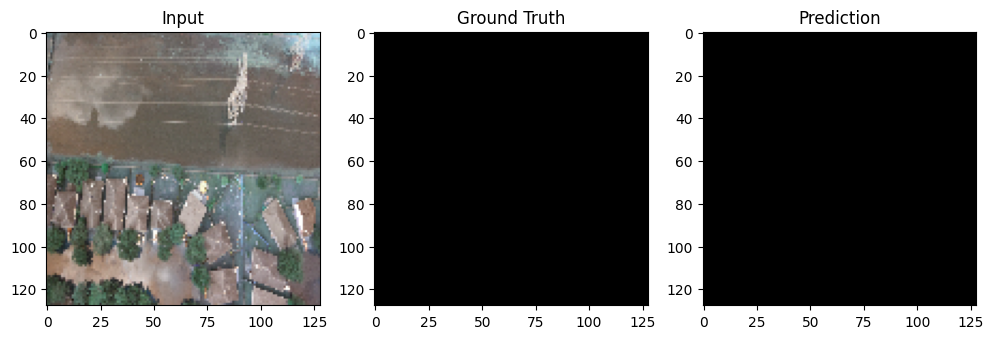

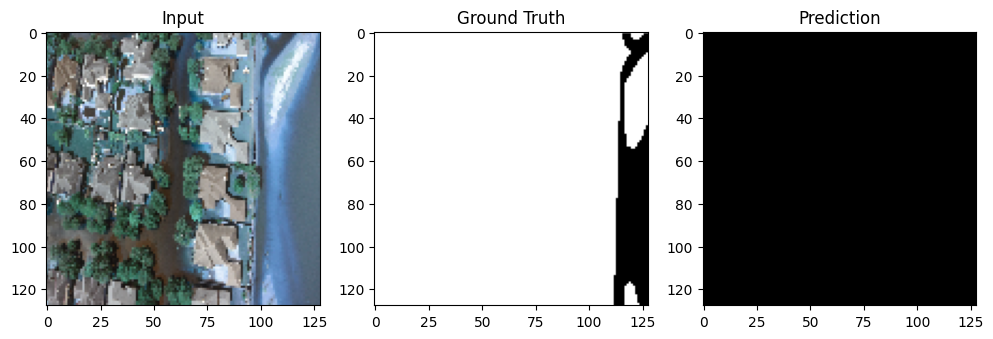

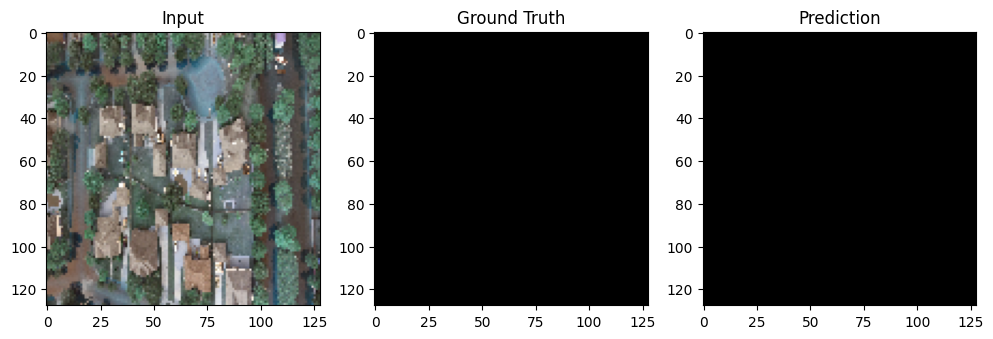

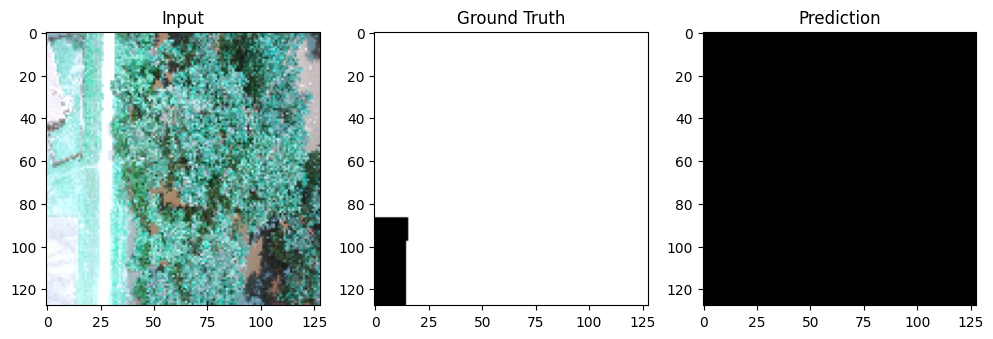

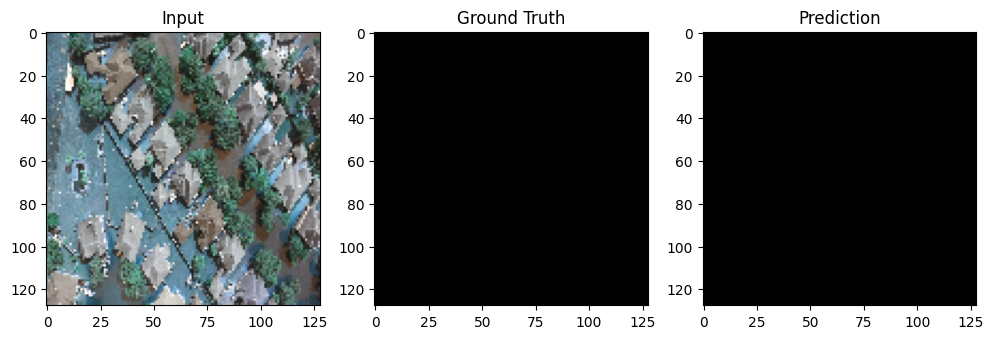

In [ ]:
preds = model.predict(X_test[:5])

for i in range(5):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title("Input")
    plt.imshow(X_test[i])

    plt.subplot(1, 3, 2)
    plt.title("Ground Truth")
    plt.imshow(np.argmax(y_test[i], axis=-1), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Prediction")
    plt.imshow(np.argmax(preds[i], axis=-1), cmap='gray')

    plt.show()

In [ ]:
unique_values = np.unique(np.argmax(preds[i], axis=-1))
print("Predicted unique values:", unique_values)

Predicted unique values: [0]


In [ ]:
model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=8)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 893ms/step - accuracy: 0.5000 - iou_metric: 0.0276 - loss: 1.4609e-07 - val_accuracy: 0.5000 - val_iou_metric: 0.0000e+00 - val_loss: 5.9605e-08
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 817ms/step - accuracy: 0.5000 - iou_metric: 0.0224 - loss: 1.2963e-07 - val_accuracy: 0.5000 - val_iou_metric: 0.0000e+00 - val_loss: 5.9605e-08
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 872ms/step - accuracy: 0.5000 - iou_metric: 0.0146 - loss: 1.0556e-07 - val_accuracy: 0.5000 - val_iou_metric: 0.0000e+00 - val_loss: 5.9605e-08
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 755ms/step - accuracy: 0.5000 - iou_metric: 0.0223 - loss: 1.3017e-07 - val_accuracy: 0.5000 - val_iou_metric: 0.0000e+00 - val_loss: 5.9605e-08
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5000 - iou_metric: 0.0256 - loss: 1.3987e-07 - val_accuracy: 0.5000 - val_iou_metric: 0.0000e+00 - val_loss: 5.9605e-08
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 756ms/step - accuracy: 0.5000 - iou_metric:

In [ ]:
def iou_metric(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=-1)
    y_true = tf.argmax(y_true, axis=-1)
    intersection = tf.reduce_sum(tf.cast(y_true == y_pred, tf.float32))
    union = tf.reduce_sum(tf.cast(tf.math.logical_or(y_true > 0, y_pred > 0), tf.float32))
    return intersection / (union + 1e-10)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy', iou_metric])

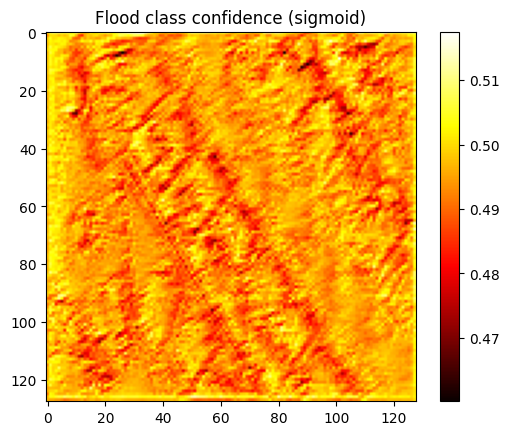

In [ ]:
# Show predicted class 1 probabilities (e.g., flood region)
# The model outputs a single channel with sigmoid, which represents the probability of the positive class.
# Access the first and only channel (index 0)
plt.imshow(preds[i][:,:,0], cmap='hot')  # Show heatmap of the single channel output
plt.colorbar()
plt.title("Flood class confidence (sigmoid)") # Update title to reflect sigmoid output
plt.show()

# Alternatively, if you want to visualize the binary prediction after thresholding:
# binary_pred = (preds[i][:,:,0] > 0.5).astype(np.uint8) # Apply a threshold
# plt.imshow(binary_pred, cmap='gray') # Show binary prediction
# plt.title("Binary Prediction (Thresholded)")
# plt.show()

In [ ]:
model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=8)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 895ms/step - accuracy: 0.5000 - iou_metric: 0.0275 - loss: 1.4445e-07 - val_accuracy: 0.5000 - val_iou_metric: 0.0000e+00 - val_loss: 5.9605e-08
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5000 - iou_metric: 0.0181 - loss: 1.1547e-07 - val_accuracy: 0.5000 - val_iou_metric: 0.0000e+00 - val_loss: 5.9605e-08
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 770ms/step - accuracy: 0.5000 - iou_metric: 0.0254 - loss: 1.3948e-07 - val_accuracy: 0.5000 - val_iou_metric: 0.0000e+00 - val_loss: 5.9605e-08
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 758ms/step - accuracy: 0.5000 - iou_metric: 0.0137 - loss: 9.8350e-08 - val_accuracy: 0.5000 - val_iou_metric: 0.0000e+00 - val_loss: 5.9605e-08
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5000 - iou_metric: 0.0289 - loss: 1.4923e-07 - val_accuracy: 0.5000 - val_iou_metric: 0.0000e+00 - val_loss: 5.9605e-08
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 761ms/step - accuracy: 0.5000 - iou_metr

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_size=(128, 128, 3)):
    # Define the input layer
    inputs = tf.keras.Input(input_size)

    # Encoder
    # First block with added Batch Normalization and Dropout
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.BatchNormalization()(c1) # Added Batch Normalization
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
    c1 = layers.BatchNormalization()(c1) # Added Batch Normalization
    p1 = layers.MaxPooling2D((2, 2))(c1)
    p1 = layers.Dropout(0.1)(p1) # Added Dropout

    # Second block (You might want to add BN and Dropout here too)
    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)
    # Add Batch Normalization and Dropout here if desired:
    # c2 = layers.BatchNormalization()(c2)
    # p2 = layers.Dropout(0.1)(p2)


    # Bottleneck
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c3)
    # Add Batch Normalization here if desired:
    # c3 = layers.BatchNormalization()(c3)


    # Decoder
    # First decoding block (Corresponding to c2)
    u4 = layers.UpSampling2D((2, 2))(c3)
    u4 = layers.concatenate([u4, c2])
    c4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u4)
    c4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c4)
    # Add Batch Normalization and Dropout here if desired:
    # c4 = layers.BatchNormalization()(c4)
    # c4 = layers.Dropout(0.1)(c4)


    # Second decoding block (Corresponding to c1)
    u5 = layers.UpSampling2D((2, 2))(c4)
    u5 = layers.concatenate([u5, c1])
    c5 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(c5)
    # Add Batch Normalization here if desired:
    # c5 = layers.BatchNormalization()(c5)


    # Output layer
    # Ensure output layer matches your task.
    # If it's binary segmentation with sigmoid, 1 filter is correct.
    # If it's multi-class or binary with softmax (e.g., Keras default), filters should match number of classes.
    # Based on your previous use of binary_crossentropy and sigmoid, 1 filter seems intended for binary.
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = models.Model(inputs, outputs)

    # Compile the model - you'll likely want to re-compile with your specific loss and metrics later
    # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # It's better to compile it outside the function after defining the model instance
    return model

# After redefining the function, create a new model instance
# model = unet_model(input_size=(128, 128, 3)) # Use the input size you loaded data with
# model.summary()
# Then re-compile the model using your desired loss and metrics (like the weighted_categorical_crossentropy and iou_metric)

In [ ]:
def dice_loss(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

def combined_loss(y_true, y_pred):
    return tf.keras.losses.categorical_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

model.compile(optimizer='adam', loss=combined_loss, metrics=['accuracy'])

In [ ]:
def iou_metric_binary(y_true, y_pred, threshold=0.5):
    # y_pred from the model is probabilities (sigmoid output)
    y_pred_binary = tf.cast(y_pred > threshold, tf.float32)
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred_binary)
    intersection = tf.reduce_sum(y_true_f * y_pred_f) # <-- Error likely here
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
    return intersection / (union + 1e-10)

In [ ]:
!ls

'image segentation.ipynb'  'kaggle (3).json'
'kaggle (3) (1).json'	    sample_data


In [ ]:
from google.colab import files
files.upload() # Upload Training Question.json here

Saving kaggle (3).json to kaggle (3) (2).json


{'kaggle (3) (2).json': b'{"username":"krishnapriyabishi","key":"48934707cfa484f364654b0e2c2815ee"}'}

In [ ]:
import json

# Ensure 'Training Question.json' has been successfully uploaded and is in the current directory.
# You can verify with !ls
with open("Training Question.json") as f:
    data = json.load(f)

# Print first annotation for inspection
print(json.dumps(data[0], indent=2))

FileNotFoundError: [Errno 2] No such file or directory: 'Training Question.json'

In [ ]:
# Ensure 'Training Question.json' has been successfully uploaded and is in the current directory.
# You can verify with !ls
!ls -l # Use -l to see file details and size to confirm upload success

total 1476
-rw-r--r-- 1 root root 1493237 May 19 20:39 'image segentation.ipynb'
-rw-r--r-- 1 root root      73 May 19 19:02 'kaggle (3) (1).json'
-rw-r--r-- 1 root root      73 May 19 20:42 'kaggle (3) (2).json'
-rw-r--r-- 1 root root      73 May 19 18:24 'kaggle (3).json'
drwxr-xr-x 1 root root    4096 May 14 13:38  sample_data


In [ ]:
from google.colab import files
import json

# This will open a file picker. Select the file named 'Training Question.json'
# from your local machine.
print("Please upload the file 'Training Question.json'")
uploaded = files.upload()

# Check if the file was uploaded successfully
if 'Training Question.json' in uploaded:
    print("'Training Question.json' uploaded successfully!")

    # Optional: Verify its presence again using !ls
    !ls -l

    # Now, attempt to open and process the file
    try:
        with open("Training Question.json", "r") as f: # Use "r" for read mode explicitly
            data = json.load(f)

        # Print first annotation for inspection
        print("\nFile content preview:")
        print(json.dumps(data[0], indent=2))
        print("\nSuccessfully loaded Training Question.json")

    except FileNotFoundError:
        # This specific error should not happen if the file was in 'uploaded'
        # but keeping it here for robustness.
        print("Error: 'Training Question.json' not found after upload check. This is unexpected.")
    except json.JSONDecodeError:
        print("Error: Could not decode JSON from 'Training Question.json'. Check file content or encoding.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

else:
    # This message was correctly triggered because the uploaded file wasn't 'Training Question.json'
    print("Error: 'Training Question.json' was not found in the uploaded files. Please try uploading again.")
    print("Ensure you select the file named 'Training Question.json' from your local computer.")

Please upload the file 'Training Question.json'


Saving kaggle (3).json to kaggle (3) (4).json
Error: 'Training Question.json' was not found in the uploaded files. Please try uploading again.
Ensure you select the file named 'Training Question.json' from your local computer.


In [ ]:
print("FloodNet Challenge - Track 2/Questions/Training Question.json")

FloodNet Challenge - Track 2/Questions/Training Question.json


In [ ]:
!cp "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 2/Questions/Training Question.json" .

In [ ]:
!cp "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 2/Questions/Training Question.json" .

In [ ]:
from google.colab import files
files.download("Training Question.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.upload()  # Select Training Question.json from your computer

Saving Training Question.json to Training Question (1).json


{'Training Question (1).json': b'{"0":{"Image_ID":"10165.JPG","Question":"What is the overall condition of the given image?","Ground_Truth":"flooded","Question_Type":"Condition_Recognition"},"1":{"Image_ID":"10166.JPG","Question":"What is the overall condition of the given image?","Ground_Truth":"flooded","Question_Type":"Condition_Recognition"},"2":{"Image_ID":"10168.JPG","Question":"What is the overall condition of the given image?","Ground_Truth":"non flooded","Question_Type":"Condition_Recognition"},"3":{"Image_ID":"10168.JPG","Question":"How many non flooded buildings can be seen in this image?","Ground_Truth":3,"Question_Type":"Complex_Counting"},"4":{"Image_ID":"10168.JPG","Question":"How many buildings can be seen in the image?","Ground_Truth":3,"Question_Type":"Simple_Counting"},"5":{"Image_ID":"10170.JPG","Question":"What is the overall condition of the given image?","Ground_Truth":"non flooded","Question_Type":"Condition_Recognition"},"6":{"Image_ID":"10170.JPG","Question":"

In [ ]:
import json

with open("Training Question.json") as f:
    data = json.load(f)

# Print first annotation for inspection
# Access the dictionary element using the string key '0'
print(json.dumps(data['0'], indent=2))

{
  "Image_ID": "10165.JPG",
  "Question": "What is the overall condition of the given image?",
  "Ground_Truth": "flooded",
  "Question_Type": "Condition_Recognition"
}


In [ ]:
import json
import pprint # Import pprint

# Load the uploaded JSON
with open("Training Question.json", "r") as f:
    data = json.load(f)

# Print the first item to understand the structure
# Access the first item using its string key '0' instead of integer 0
pprint.pprint(data['0'])

{'Ground_Truth': 'flooded',
 'Image_ID': '10165.JPG',
 'Question': 'What is the overall condition of the given image?',
 'Question_Type': 'Condition_Recognition'}


In [ ]:
from PIL import Image, ImageDraw

def create_mask(img_shape, annotations):
    mask = Image.new("L", img_shape, 0)
    draw = ImageDraw.Draw(mask)
    for ann in annotations:
        if "polygon" in ann:
            draw.polygon(ann["polygon"], outline=1, fill=1)
    return np.array(mask)


In [ ]:
from PIL import Image, ImageDraw
import os # Import os if not already imported

def create_mask(img_shape, annotations):
    mask = Image.new("L", img_shape, 0)
    draw = ImageDraw.Draw(mask)
    for ann in annotations:
        if "polygon" in ann:
            # Ensure polygons are flatten lists of coordinates
            flattened_polygon = [coord for point in ann["polygon"] for coord in point]
            # PIL expects a list of (x, y) tuples or a flattened list [x1, y1, x2, y2, ...]
            # The current list of lists [[x1, y1], [x2, y2], ...] works directly with draw.polygon in newer PIL versions.
            # If you encounter issues, convert to a flattened list:
            # flattened_polygon = [coord for point in ann["polygon"] for coord in point]
            draw.polygon(ann["polygon"], outline=1, fill=1)
    return np.array(mask)

# You need to set image_dir correctly.
# Based on previous cells, the training images are likely here:
# "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 2/Images/Train_Image"
# Replace "/path/to/Train_Image" with the correct path.
# Let's use the BASE_PATH defined in previous cells and the specific subdirectory
BASE_PATH = "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1"
image_dir = os.path.join(BASE_PATH, "FloodNet Challenge - Track 2", "Images", "Train_Image")
mask_dir = "/content/generated_masks" # Keep generating masks in a local directory
os.makedirs(mask_dir, exist_ok=True)

# Assuming 'data' dictionary is loaded from "Training Question.json" in a previous cell
# Iterate over the *values* of the data dictionary
for item in data.values(): # Changed from 'for item in data:'
    # Add error handling in case 'image' or 'annotations' key is missing
    if "image" in item and "annotations" in item:
        img_name = item["image"]
        annotations = item["annotations"] # Get the annotations list

        img_path = os.path.join(image_dir, img_name)

        # Check if the image file exists before trying to open it
        if not os.path.exists(img_path):
            print(f"Warning: Image file not found at {img_path}. Skipping.")
            continue

        try:
            img = Image.open(img_path).convert("RGB")
            img = img.resize((128, 128))

            # Pass the list of annotations to create_mask
            mask = create_mask((128, 128), annotations)
            mask = Image.fromarray(mask)

            mask_filename = img_name.replace(".JPG", ".png") # Ensure correct extension
            mask_save_path = os.path.join(mask_dir, mask_filename)
            mask.save(mask_save_path)
            # print(f"Successfully processed {img_name}") # Uncomment for verbose logging
        except Exception as e:
            print(f"Error processing image {img_name}: {e}")
    else:
        print(f"Warning: Skipping item with missing 'image' or 'annotations' key: {item}")

print(f"Finished generating masks in {mask_dir}")

Finished generating masks in /content/generated_masks


In [ ]:
# Replace "/path/to/Train_Image" with the correct path.

In [ ]:
# Make sure BASE_PATH is correctly defined, e.g., from the kagglehub download
# BASE_PATH = "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1"
# Assuming BASE_PATH is correctly set from earlier steps

# Define image_dir using the correct path structure relative to BASE_PATH
image_dir = os.path.join(BASE_PATH, "FloodNet Challenge - Track 2", "Images", "Train_Image")
# Define mask_dir - ensure this directory exists and contains the generated masks
mask_dir = "/content/generated_masks" # Assuming you generated masks here

def load_dataset(img_dir, mask_dir, size=(128, 128), limit=100):
    X, Y = [], []
    # Use a try-except block or check if the directory exists before listing
    if not os.path.exists(img_dir):
        print(f"Error: Image directory not found: {img_dir}")
        return np.array(X), np.array(Y)
    if not os.path.exists(mask_dir):
        print(f"Error: Mask directory not found: {mask_dir}")
        return np.array(X), np.array(Y)

    # List image files
    image_files = sorted(os.listdir(img_dir))

    print(f"Found {len(image_files)} images in {img_dir}")
    print(f"Loading up to {limit} images and corresponding masks...")

    # Iterate through the image files
    for img_file in image_files[:limit]:
        img_path = os.path.join(img_dir, img_file)
        # Construct the expected mask filename
        mask_file = img_file.replace(".JPG", ".png") # Assuming JPG images correspond to PNG masks
        mask_path = os.path.join(mask_dir, mask_file)

        # Check if both image and corresponding mask exist
        if os.path.exists(img_path) and os.path.exists(mask_path):
            img = cv2.imread(img_path)
            mask = cv2.imread(mask_path, 0) # Read mask in grayscale

            if img is not None and mask is not None:
                # Resize and process image
                img = cv2.resize(img, size) / 255.0

                # Resize and process mask - use nearest neighbor for segmentation
                mask = cv2.resize(mask, size, interpolation=cv2.INTER_NEAREST)
                # Ensure mask is binary if needed for your model (e.g., values 0 or 1)
                # If original mask was 0/255, this will be 0/255 after resize. Convert 255 to 1.
                mask[mask > 0] = 1
                mask = np.expand_dims(mask, axis=-1) # Add channel dimension

                X.append(img)
                Y.append(mask)
            else:
                 print(f"Warning: Failed to read image {img_path} or mask {mask_path}. Skipping.")
        else:
            # This can happen if a mask wasn't generated for a specific image
            # or if the filename matching logic is incorrect.
            print(f"Warning: Corresponding mask not found for image {img_file} at expected path {mask_path}. Skipping.")


    print(f"Successfully loaded {len(X)} image/mask pairs.")
    return np.array(X), np.array(Y)

# Now call the function with the correctly defined directories
X, Y = load_dataset(image_dir, mask_dir)

Found 1448 images in /root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 2/Images/Train_Image
Loading up to 100 images and corresponding masks...
Successfully loaded 0 image/mask pairs.


In [ ]:
import os
import numpy as np
from PIL import Image, ImageDraw
import json

# Path setup
json_path = "Training Question.json"
# Update this path to the correct directory where your training images are located
# Based on previous successful cells, this should be relative to BASE_PATH
BASE_PATH = "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1"
image_folder = os.path.join(BASE_PATH, "FloodNet Challenge - Track 2", "Images", "Train_Image")
mask_output_folder = "/content/generated_masks"
os.makedirs(mask_output_folder, exist_ok=True)

# Load JSON
with open(json_path) as f:
    annotations_data = json.load(f) # Renamed variable to avoid confusion with loop variable 'annotations'

# Function to create a blank mask and draw polygons
def create_mask_from_polygons(image_name, objects, size=(128, 128)):
    mask = Image.new("L", size, 0)
    draw = ImageDraw.Draw(mask)
    for obj in objects:
        if "polygon" in obj:
            # PIL expects a list of (x, y) tuples. Ensure the format is correct.
            # The structure from the JSON looks like a list of [x, y] lists,
            # which PIL's draw.polygon can handle directly.
            draw.polygon(obj["polygon"], outline=1, fill=1) # Use obj["polygon"] directly
    return mask

# Generate masks
# Iterate over the *values* of the loaded dictionary
for item in annotations_data.values(): # CHANGE: Iterate over values()
    # Add error handling in case 'image' or 'annotations' key is missing
    if "image" in item and "annotations" in item:
        image_name = item["image"]
        # 'item["annotations"]' should be the list of annotation objects for this image
        image_annotations = item["annotations"] # Renamed variable

        img_path = os.path.join(image_folder, image_name)

        # Check if the image file exists before trying to open it
        if not os.path.exists(img_path):
            print(f"Warning: Image file not found at {img_path}. Skipping.")
            continue

        try:
            img = Image.open(img_path).convert("RGB")
            img = img.resize((128, 128))

            # Pass the list of annotations to create_mask_from_polygons
            mask = create_mask_from_polygons(image_name, image_annotations, size=(128, 128)) # Pass image_annotations list
            # mask is already a PIL Image object, no need for Image.fromarray if create_mask returns PIL Image

            # Save mask with same base filename
            mask_filename = image_name.replace(".JPG", ".png")
            mask_save_path = os.path.join(mask_output_folder, mask_filename)
            mask.save(mask_save_path)
            # print(f"Successfully processed {img_name}") # Uncomment for verbose logging
        except Exception as e:
            print(f"Error processing image {img_name}: {e}")
    else:
        # This might indicate an entry in the JSON that isn't a standard image annotation
        print(f"Warning: Skipping item with unexpected format (missing 'image' or 'annotations' key): {item}")

print(f"Finished generating masks in {mask_output_folder}")

Finished generating masks in /content/generated_masks


In [ ]:
import json
from pprint import pprint

with open("Training Question.json") as f:
    data = json.load(f)

# Show the first example from the dictionary using the string key '0'
pprint(data['0'])

{'Ground_Truth': 'flooded',
 'Image_ID': '10165.JPG',
 'Question': 'What is the overall condition of the given image?',
 'Question_Type': 'Condition_Recognition'}


In [ ]:
import json

with open("Training Question.json") as f:
    data = json.load(f)

# Build a label dictionary by iterating over the VALUES of the dictionary
image_labels = {entry["Image_ID"]: entry["Ground_Truth"] for entry in data.values()} # Changed data to data.values()
classes = sorted(set(image_labels.values()))
class_to_idx = {c: i for i, c in enumerate(classes)}

print("Classes found:", classes)

FileNotFoundError: [Errno 2] No such file or directory: 'Training Question.json'

In [ ]:
# First, check the current working directory to be sure you are where you expect
!pwd

# List the files in the current directory to see if 'Training Question.json' is present
!ls -l

# If 'Training Question.json' is NOT listed above, you need to either re-upload or re-copy it.

# Option 1: Re-upload using the file picker
# This is the safest bet if you have the file locally.
from google.colab import files
print("Please upload the file 'Training Question.json' again.")
uploaded = files.upload()

if 'Training Question.json' in uploaded:
    print("'Training Question.json' uploaded successfully!")
else:
    print("Error: 'Training Question.json' was not found in the uploaded files.")


# Option 2: Re-copy from the KaggleHub path (only if you are sure it's there)
# You've used this path before, ensure it's correct and the source file exists.
# !cp "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 2/Questions/Training Question.json" .
# print("Attempted to copy 'Training Question.json'. Check with !ls -l")


# After re-uploading or re-copying, verify again:
!ls -l

# Now, retry opening the file
import json

try:
    with open("Training Question.json") as f:
        data = json.load(f)

    # Build a label dictionary by iterating over the VALUES of the dictionary
    # Ensure 'entry' has the expected keys. Iterating data.values() assumes
    # each value in the top-level dictionary is an annotation entry.
    # Based on your previous successful use of data['0'], the structure
    # appears to be a dictionary of dictionaries, indexed by string keys like '0', '1', etc.
    # Each inner dictionary is the "entry".
    image_labels = {entry["Image_ID"]: entry["Ground_Truth"] for entry in data.values() if "Image_ID" in entry and "Ground_Truth" in entry}

    classes = sorted(set(image_labels.values()))
    class_to_idx = {c: i for i, c in enumerate(classes)}

    print("Classes found:", classes)
    print("Successfully loaded data and built label dictionary.")

except FileNotFoundError:
    print("Error: 'Training Question.json' still not found after checks.")
except json.JSONDecodeError:
    print("Error: Could not decode JSON from 'Training Question.json'. Check file content.")
except KeyError as e:
    print(f"Error: Missing expected key in JSON entry: {e}. Check JSON structure.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

/content
total 648
drwxr-xr-x 1 root root   4096 May 14 13:38  sample_data
-rw-r--r-- 1 root root 655923 May 20 14:20 'Training Question.json'
Please upload the file 'Training Question.json' again.


Saving Training Question.json to Training Question (1).json
Error: 'Training Question.json' was not found in the uploaded files.
total 1292
drwxr-xr-x 1 root root   4096 May 14 13:38  sample_data
-rw-r--r-- 1 root root 655923 May 20 14:22 'Training Question (1).json'
-rw-r--r-- 1 root root 655923 May 20 14:20 'Training Question.json'
An unexpected error occurred: '<' not supported between instances of 'str' and 'int'


In [ ]:
import json

with open("Training Question.json") as f:
    data = json.load(f)

# Build a label dictionary by iterating over the VALUES of the dictionary
# Convert the "Ground_Truth" value to a string explicitly
image_labels = {entry["Image_ID"]: str(entry["Ground_Truth"]) for entry in data.values() if "Image_ID" in entry and "Ground_Truth" in entry}

# Show all unique classes
# Now, all values in image_labels.values() are strings, so sorting should work
classes = sorted(set(image_labels.values()))
print("Classes found:", classes)

# Create label encoding
class_to_idx = {label: idx for idx, label in enumerate(classes)}
print("Class to index:", class_to_idx)

Classes found: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '27', '29', '3', '35', '36', '4', '5', '6', '7', '8', '9', 'No', 'Yes', 'flooded', 'flooded,non flooded', 'non flooded']
Class to index: {'1': 0, '10': 1, '11': 2, '12': 3, '13': 4, '14': 5, '15': 6, '16': 7, '17': 8, '18': 9, '19': 10, '2': 11, '20': 12, '21': 13, '22': 14, '23': 15, '24': 16, '25': 17, '27': 18, '29': 19, '3': 20, '35': 21, '36': 22, '4': 23, '5': 24, '6': 25, '7': 26, '8': 27, '9': 28, 'No': 29, 'Yes': 30, 'flooded': 31, 'flooded,non flooded': 32, 'non flooded': 33}


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf

image_dir = "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 2/Images/Train_Image"

def load_images_with_labels(image_dir, image_labels, class_to_idx, size=(128, 128), limit=None):
    X, Y = [], []

    # --- Added check for directory existence ---
    if not os.path.isdir(image_dir):
        print(f"Error: Image directory not found: {image_dir}")
        # Optionally return empty arrays or raise an error
        return np.array(X), np.array(Y)
    # --- End of added check ---

    all_images = sorted([f for f in os.listdir(image_dir) if f.endswith(".JPG")])

    if limit:
        all_images = all_images[:limit]

    for img_file in all_images:
        label_str = image_labels.get(img_file)
        if label_str is None:
            print(f"Label missing for {img_file}, skipping.")
            continue

        # Ensure the label string is in the class_to_idx dictionary before accessing it
        if label_str not in class_to_idx:
             print(f"Warning: Label '{label_str}' for image '{img_file}' not found in class_to_idx. Skipping.")
             continue

        label = class_to_idx[label_str]

        # Load and resize image
        img_path = os.path.join(image_dir, img_file)
        # Add a check if the image file exists, although os.listdir should only list existing files
        if not os.path.exists(img_path):
             print(f"Warning: Image file not found at {img_path} during iteration. Skipping.")
             continue

        img = cv2.imread(img_path)

        # Check if image was read successfully
        if img is None:
             print(f"Warning: Failed to read image file {img_path}. Skipping.")
             continue

        img = cv2.resize(img, size)
        img = img.astype("float32") / 255.0

        X.append(img)
        Y.append(label)

    X = np.array(X)
    # Handle the case where no images were loaded to avoid errors in to_categorical
    if len(Y) == 0:
         print("No valid images found to process.")
         return np.array([]), np.array([]) # Return empty arrays

    Y = tf.keras.utils.to_categorical(Y, num_classes=len(class_to_idx))
    return X, Y

X, Y = load_images_with_labels(image_dir, image_labels, class_to_idx, limit=200)
print("Loaded dataset:", X.shape, Y.shape)

Error: Image directory not found: /root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 2/Images/Train_Image
Loaded dataset: (0,) (0,)


In [ ]:
for root, dirs, files in os.walk("/root/.cache"):
    for d in dirs:
        print("📁", os.path.join(root, d))

📁 /root/.cache/node-gyp
📁 /root/.cache/matplotlib
📁 /root/.cache/node-gyp/20.19.0
📁 /root/.cache/node-gyp/20.19.0/include
📁 /root/.cache/node-gyp/20.19.0/include/node
📁 /root/.cache/node-gyp/20.19.0/include/node/libplatform
📁 /root/.cache/node-gyp/20.19.0/include/node/openssl
📁 /root/.cache/node-gyp/20.19.0/include/node/cppgc
📁 /root/.cache/node-gyp/20.19.0/include/node/uv
📁 /root/.cache/node-gyp/20.19.0/include/node/openssl/archs
📁 /root/.cache/node-gyp/20.19.0/include/node/openssl/archs/linux-x86_64
📁 /root/.cache/node-gyp/20.19.0/include/node/openssl/archs/VC-WIN64-ARM
📁 /root/.cache/node-gyp/20.19.0/include/node/openssl/archs/linux64-riscv64
📁 /root/.cache/node-gyp/20.19.0/include/node/openssl/archs/linux64-s390x
📁 /root/.cache/node-gyp/20.19.0/include/node/openssl/archs/linux-aarch64
📁 /root/.cache/node-gyp/20.19.0/include/node/openssl/archs/linux-elf
📁 /root/.cache/node-gyp/20.19.0/include/node/openssl/archs/darwin-i386-cc
📁 /root/.cache/node-gyp/20.19.0/include/node/openssl/arch

In [ ]:
import kagglehub

path = kagglehub.dataset_download("aletbm/aerial-imagery-dataset-floodnet-challenge")
print("✅ Dataset downloaded to:", path)

100%|██████████| 23.3G/23.3G [04:52<00:00, 85.6MB/s]

Extracting files...


✅ Dataset downloaded to: /root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1


In [ ]:
!ls -R "$path"

/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1:
'FloodNet Challenge - Track 1'	'FloodNet Challenge - Track 2'

'/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 1':
class_mapping.csv  Test  Train	Validation

'/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 1/Test':
image

'/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 1/Test/image':
10163.jpg  6632.jpg  6963.jpg  7413.jpg  7821.jpg  8076.jpg  8363.jpg  8934.jpg
10164.jpg  6638.jpg  6979.jpg  7415.jpg  7822.jpg  8100.jpg  8364.jpg  8937.jpg
10167.jpg  6659.jpg  7004.jpg  7420.jpg  7835.jpg  8103.jpg  8367.jpg  8942.jpg
10174.jpg  6663.jpg  7016.jpg  7423.jpg  7839.jpg  8104.jpg  8372.jpg  8945.jpg
10183.jpg  6671.jpg  7023.jpg  7431.jpg  7840.jpg  8111.jpg  8376.jpg  8948.jpg
10808.

In [ ]:
image_dir = "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 2/Images/Train_Image"

In [ ]:
import json

# Ensure 'Training Question (1).json' has been successfully uploaded and is in the current directory.
# You can verify with !ls
with open("Training Question (1).json") as f:
    data = json.load(f)

# Build label map by iterating over the VALUES of the dictionary
# Each 'entry' will now be the dictionary corresponding to an image annotation
# Convert the "Ground_Truth" value to a string explicitly during dictionary creation
image_labels = {entry["Image_ID"]: str(entry["Ground_Truth"]) for entry in data.values()}

# Now, all values in image_labels.values() are strings, so sorting should work
classes = sorted(set(image_labels.values()))

# Create label encoding
class_to_idx = {label: idx for idx, label in enumerate(classes)}


print("Classes:", classes)
print("Class to index mapping:", class_to_idx)

Classes: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '27', '29', '3', '35', '36', '4', '5', '6', '7', '8', '9', 'No', 'Yes', 'flooded', 'flooded,non flooded', 'non flooded']
Class to index mapping: {'1': 0, '10': 1, '11': 2, '12': 3, '13': 4, '14': 5, '15': 6, '16': 7, '17': 8, '18': 9, '19': 10, '2': 11, '20': 12, '21': 13, '22': 14, '23': 15, '24': 16, '25': 17, '27': 18, '29': 19, '3': 20, '35': 21, '36': 22, '4': 23, '5': 24, '6': 25, '7': 26, '8': 27, '9': 28, 'No': 29, 'Yes': 30, 'flooded': 31, 'flooded,non flooded': 32, 'non flooded': 33}


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf

def load_images_with_labels(image_dir, image_labels, class_to_idx, size=(128, 128), limit=None):
    X, Y = [], []
    all_images = sorted([f for f in os.listdir(image_dir) if f.endswith(".JPG")])

    if limit:
        all_images = all_images[:limit]

    for img_file in all_images:
        label_str = image_labels.get(img_file)
        if label_str is None:
            print(f"Skipping unlabeled image: {img_file}")
            continue

        label = class_to_idx[label_str]

        img_path = os.path.join(image_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, size)
        img = img.astype("float32") / 255.0

        X.append(img)
        Y.append(label)

    X = np.array(X)
    Y = tf.keras.utils.to_categorical(Y, num_classes=len(class_to_idx))
    return X, Y

image_dir = "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 2/Images/Train_Image"
X, Y = load_images_with_labels(image_dir, image_labels, class_to_idx, limit=200)
print("✅ Loaded:", X.shape, Y.shape)

✅ Loaded: (200, 128, 128, 3) (200, 34)


In [ ]:
from tensorflow.keras import layers, models

def build_cnn(input_shape=(128, 128, 3), num_classes=3):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_cnn(num_classes=len(class_to_idx))
model.fit(X, Y, epochs=10, validation_split=0.2, batch_size=16)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 730ms/step - accuracy: 0.3470 - loss: 2.8222 - val_accuracy: 0.5500 - val_loss: 1.8076
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - accuracy: 0.4871 - loss: 1.9385 - val_accuracy: 0.5500 - val_loss: 1.7426
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 431ms/step - accuracy: 0.4701 - loss: 1.7346 - val_accuracy: 0.5500 - val_loss: 1.6696
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 547ms/step - accuracy: 0.5859 - loss: 1.2818 - val_accuracy: 0.5750 - val_loss: 1.6246
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 374ms/step - accuracy: 0.6434 - loss: 1.0401 - val_accuracy: 0.5500 - val_loss: 1.7066
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 490ms/step - accuracy: 0.7004 - loss: 0.8947 - val_accuracy: 0.5750 - val_loss: 1.6833
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 391ms/step - accuracy: 0.7907 - loss: 0.6890 - val_accuracy: 0.4250 - val_loss: 1.8980
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 385ms/step - accuracy: 0.8308 - loss: 0.5265 - val_accuracy: 0

In [ ]:
i = 0
pred = model.predict(np.expand_dims(X[i], axis=0))[0]
pred_class = classes[np.argmax(pred)]
actual_class = classes[np.argmax(Y[i])]

print("Predicted:", pred_class)
print("Actual   :", actual_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
Predicted: flooded
Actual   : flooded


Loaded images shape: (200, 128, 128, 3)
Loaded labels shape: (200, 34)


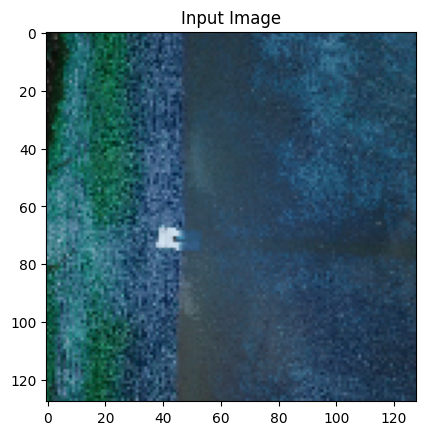

Actual Label for image 0: flooded


In [ ]:
print("Loaded images shape:", X.shape)
print("Loaded labels shape:", Y.shape) # Changed message from 'masks' to 'labels'

# Show one sample
import matplotlib.pyplot as plt
plt.imshow(X[0])
plt.title("Input Image")
plt.show()

# The variable Y here contains the image classification labels, not pixel masks.
# Therefore, it cannot be displayed as an image mask using plt.imshow.
# The following line is removed:
# plt.imshow(Y[0].squeeze(), cmap="gray")
# plt.title("Corresponding Mask")
# plt.show()

# To show the actual label for the image:
actual_label_index = np.argmax(Y[0])
actual_label_string = classes[actual_label_index] # Assuming 'classes' list is available
print(f"Actual Label for image {i}: {actual_label_string}")

In [ ]:
# Run prediction
i = 0  # or any image index
prediction = model.predict(np.expand_dims(X[i], axis=0))[0]
predicted_label = classes[np.argmax(prediction)]
actual_label = classes[np.argmax(Y[i])]

print(f"🔮 Predicted Label: {predicted_label}")
print(f"✅ Actual Label   : {actual_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
🔮 Predicted Label: flooded
✅ Actual Label   : flooded


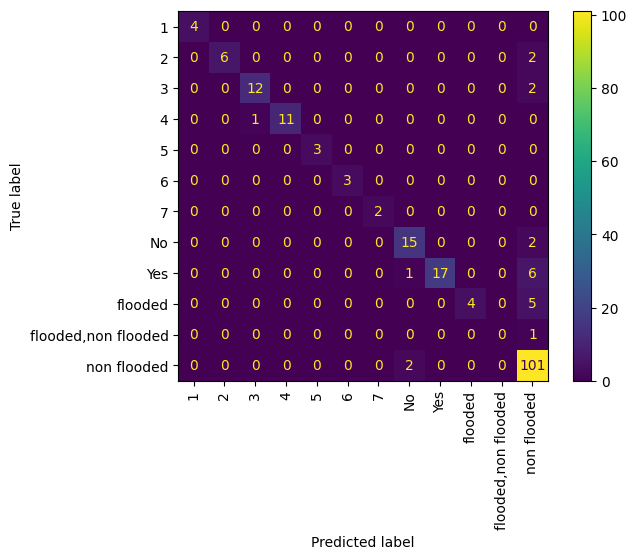

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np # Ensure numpy is imported if not already

# y_true and y_pred should already be calculated correctly
# y_true = np.argmax(Y, axis=1)
# y_pred = np.argmax(model.predict(X), axis=1)

cm = confusion_matrix(y_true, y_pred)

# Get the unique labels that were actually present in y_true (and y_pred)
# These correspond to the classes the model was trained on and predicted.
actual_indices_present = np.unique(np.concatenate((y_true, y_pred)))

# Create a list of the class names that correspond to these indices
# Assuming 'classes' is the list of all possible class names from the JSON
# And class_to_idx maps these names to indices.
# We need a reverse mapping from index to class name for the classes that were *used*.

# Create index to class name mapping for ALL classes
idx_to_class = {v: k for k, v in class_to_idx.items()}

# Select only the class names for the indices actually present in the data used for CM
# Use a sorted list of the actual_indices_present to ensure correct order
display_labels_for_cm = [idx_to_class[idx] for idx in sorted(actual_indices_present)]


# Initialize ConfusionMatrixDisplay with the confusion matrix and the correct display labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels_for_cm)

# Plot the confusion matrix
import matplotlib.pyplot as plt # Ensure matplotlib is imported
disp.plot(xticks_rotation=90)
plt.show() # Add plt.show() to display the plot

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
from tensorflow.keras import layers, models

def build_classifier(input_shape=(128, 128, 3), num_classes=34):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_classifier(num_classes=len(classes))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X, Y, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 406ms/step - accuracy: 0.2742 - loss: 3.9995 - val_accuracy: 0.5500 - val_loss: 2.0359
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 406ms/step - accuracy: 0.5139 - loss: 2.0632 - val_accuracy: 0.5500 - val_loss: 2.0076
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 495ms/step - accuracy: 0.5315 - loss: 1.8628 - val_accuracy: 0.5500 - val_loss: 1.8269
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 425ms/step - accuracy: 0.5117 - loss: 1.7207 - val_accuracy: 0.5500 - val_loss: 1.8687
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 483ms/step - accuracy: 0.4988 - loss: 1.5926 - val_accuracy: 0.5500 - val_loss: 1.7766
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 386ms/step - accuracy: 0.5219 - loss: 1.3692 - val_accuracy: 0.5500 - val_loss: 1.8972
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.6077 - loss: 1.1791 - val_accuracy: 0.5500 - val_loss: 1.8323
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 480ms/step - accuracy: 0.5424 - loss: 1.2080 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


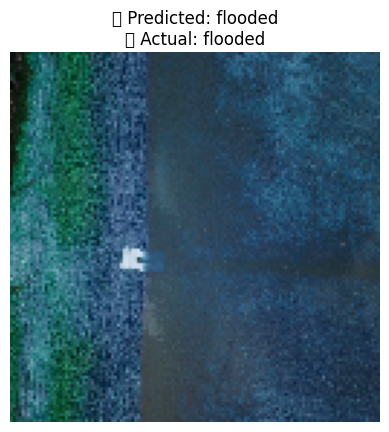

In [ ]:
import matplotlib.pyplot as plt
i = 0  # change to try other images

prediction = model.predict(np.expand_dims(X[i], axis=0))[0]
predicted_label = classes[np.argmax(prediction)]
actual_label = classes[np.argmax(Y[i])]

plt.imshow(X[i])
plt.title(f"🔮 Predicted: {predicted_label}\n✅ Actual: {actual_label}")
plt.axis("off")
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X, Y)
print(f"✅ Accuracy on full dataset: {test_acc:.2%}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.7411 - loss: 0.7199
✅ Accuracy on full dataset: 70.50%


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step
📊 Classification Report:
                     precision    recall  f1-score   support

                  1       1.00      1.00      1.00         4
                  2       1.00      0.12      0.22         8
                  3       1.00      0.21      0.35        14
                  4       0.71      1.00      0.83        12
                  5       0.75      1.00      0.86         3
                  6       0.00      0.00      0.00         3
                  7       1.00      1.00      1.00         2
                 No       0.89      0.47      0.62        17
                Yes       1.00      0.12      0.22        24
            flooded       1.00      0.33      0.50         9
flooded,non flooded       0.00      0.00      0.00         1
        non flooded       0.66      0.99      0.79       103

           accuracy                           0.70       200
          macro avg       0.75      0.52      0.53       200
       weighted avg

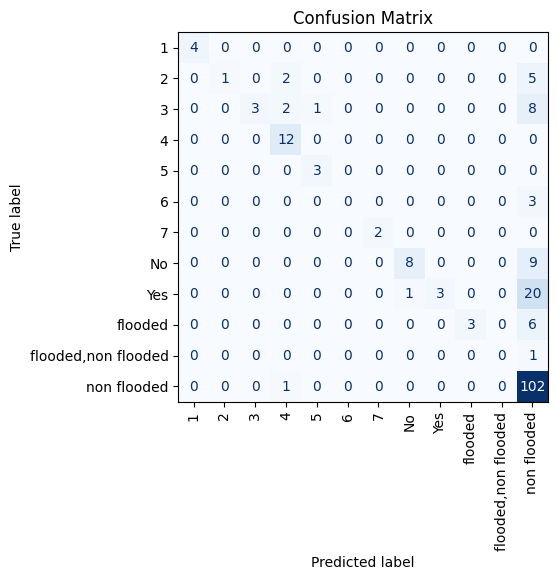

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt # Ensure matplotlib is imported

# Assuming X and Y are loaded as in previous cells

y_true = np.argmax(Y, axis=1)
y_pred = np.argmax(model.predict(X), axis=1)

# Identify the unique labels present in the ground truth data
present_labels = np.unique(y_true)

# Filter the target_names to only include names for the present labels
# This requires mapping the numerical labels back to the class names
# Assuming 'classes' list and 'class_to_idx' dictionary are available from previous steps
# classes = ['0', '1', ..., '33'] # Example structure of 'classes'
# class_to_idx = {'0': 0, '1': 1, ..., '33': 33} # Example structure of 'class_to_idx'

# Create a mapping from index back to class name
idx_to_class = {idx: cls for cls, idx in class_to_idx.items()}

# Get the names for the present labels
present_target_names = [idx_to_class[label] for label in present_labels]


# Classification report
print("📊 Classification Report:")
# Pass the actual unique labels found in y_true to the 'labels' parameter
# Also, pass the corresponding target names
print(classification_report(y_true, y_pred, labels=present_labels, target_names=present_target_names, zero_division=0)) # Added zero_division to handle classes with no predictions or true values

# Confusion matrix
# ConfusionMatrixDisplay also needs the actual labels present in the data
cm = confusion_matrix(y_true, y_pred, labels=present_labels)
# Make sure the display labels match the order of labels passed to confusion_matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=present_target_names)
disp.plot(xticks_rotation=90, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix")
plt.show()

# You might also want to evaluate performance on the test set separately
# test_loss, test_acc = model.evaluate(X_test, y_test) # Assuming X_test, y_test are defined
# print(f"✅ Accuracy on test dataset: {test_acc:.2%}")

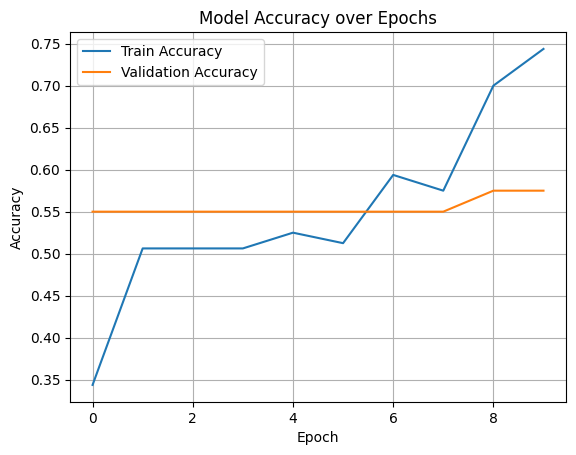

In [ ]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
flooded_img_dir = "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 1/Train/Labeled/Flooded/image"
flooded_mask_dir = "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 1/Train/Labeled/Flooded/mask"

In [ ]:
import cv2
import numpy as np
import os

def load_segmentation_data(img_dir, mask_dir, size=(128, 128), limit=100):
    X, Y = [], []
    img_files = sorted([f for f in os.listdir(img_dir) if f.endswith(".JPG") or f.endswith(".jpg")])[:limit]

    for img_file in img_files:
        base_name = img_file.split(".")[0]
        mask_file = base_name + "_lab.png"
        mask_path = os.path.join(mask_dir, mask_file)
        img_path = os.path.join(img_dir, img_file)

        if not os.path.exists(mask_path):
            print(f"Skipping {img_file} due to missing mask.")
            continue

        img = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        img = cv2.resize(img, size) / 255.0
        mask = cv2.resize(mask, size)
        mask = np.expand_dims(mask, axis=-1) / 255.0  # binary mask [0 or 1]

        X.append(img)
        Y.append(mask)

    return np.array(X), np.array(Y)

X_seg, Y_seg = load_segmentation_data(flooded_img_dir, flooded_mask_dir, limit=200)
print("Segmentation Dataset:", X_seg.shape, Y_seg.shape)

Segmentation Dataset: (51, 128, 128, 3) (51, 128, 128, 1)


In [ ]:
from tensorflow.keras import layers, models

def build_unet(input_shape=(128, 128, 3)):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D()(c1)

    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D()(c2)

    # Bottleneck
    b = layers.Conv2D(64, 3, activation='relu', padding='same')(p2)

    # Decoder
    u1 = layers.UpSampling2D()(b)
    u1 = layers.Concatenate()([u1, c2])
    c3 = layers.Conv2D(32, 3, activation='relu', padding='same')(u1)

    u2 = layers.UpSampling2D()(c3)
    u2 = layers.Concatenate()([u2, c1])
    c4 = layers.Conv2D(16, 3, activation='relu', padding='same')(u2)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c4)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

unet = build_unet()
unet.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │        448 │ input_layer_2[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 128, 128,  │      2,320 │ conv2d_4[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 64, 64,    │      9,248 │ conv2d_6[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 64, 64,    │          0 │ conv2d_8[0][0]    │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 96)               │            │ conv2d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 64, 64,    │     27,680 │ concatenate[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 128, 128,  │          0 │ conv2d_9[0][0]    │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128, 128,  │          0 │ up_sampling2d_1[… │
│ (Concatenate)       │ 48)               │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 128, 128,  │      6,928 │ concatenate_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 128, 128,  │         17 │ conv2d_10[0][0]   │
│                     │ 1)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 69,777 (272.57 KB)

 Trainable params: 69,777 (272.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = unet.fit(X_seg, Y_seg, validation_split=0.2, epochs=10, batch_size=8)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.0026 - loss: 0.6643 - val_accuracy: 0.0459 - val_loss: 0.4457
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 828ms/step - accuracy: 0.0090 - loss: 0.3249 - val_accuracy: 0.0459 - val_loss: 0.1595
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.0152 - loss: 0.1620 - val_accuracy: 0.0459 - val_loss: 0.2217
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 855ms/step - accuracy: 0.0044 - loss: 0.1627 - val_accuracy: 0.0459 - val_loss: 0.1255
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 762ms/step - accuracy: 0.0092 - loss: 0.1137 - val_accuracy: 0.0459 - val_loss: 0.1325
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.0044 - loss: 0.1224 - val_accuracy: 0.0459 - val_loss: 0.1253
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 718ms/step - accuracy: 0.0072 - loss: 0.1139 - val_accuracy: 0.0459 - val_loss: 0.1299
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 751ms/step - accuracy: 0.0076 - loss: 0.1126 - val_accuracy: 0.0459 - val_loss: 0.121

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


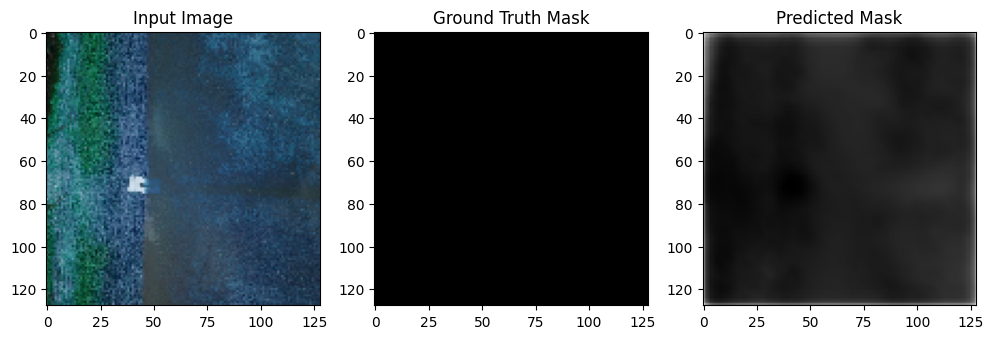

In [ ]:
import matplotlib.pyplot as plt

i = 0
pred = unet.predict(np.expand_dims(X_seg[i], axis=0))[0]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(X_seg[i])
plt.title("Input Image")

plt.subplot(1, 3, 2)
plt.imshow(Y_seg[i].squeeze(), cmap="gray")
plt.title("Ground Truth Mask")

plt.subplot(1, 3, 3)
plt.imshow(pred.squeeze(), cmap="gray")
plt.title("Predicted Mask")
plt.show()

In [ ]:
def iou(y_true, y_pred, threshold=0.5):
    y_pred = (y_pred > threshold).astype(np.float32)
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / union if union > 0 else 0

score = iou(Y_seg[0], unet.predict(np.expand_dims(X_seg[0], axis=0))[0])
print(f"IoU score for image 0: {score:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
IoU score for image 0: 0.00


In [ ]:
def preprocess(image, mask, img_size=(128,128)):
    image = tf.image.resize(image, img_size) / 255.0
    mask = tf.image.resize(mask, img_size, method='nearest')
    return image, mask

In [ ]:
def unet_model(input_size=(128,128,3), num_classes=12):
    inputs = tf.keras.Input(input_size)
    # Add encoder-decoder layers here (or use prebuilt UNet)
    outputs = tf.keras.layers.Conv2D(num_classes, (1,1), activation='softmax')(x)
    return tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from glob import glob

# Define BASE_PATH - ensure this matches the path from the kagglehub download
# You might need to adjust this path if your dataset is located elsewhere
BASE_PATH = "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1"

# Define directories for images and masks
image_train_dir = os.path.join(BASE_PATH, "FloodNet Challenge - Track 2", "Images", "Train_Image")
mask_dir = os.path.join(BASE_PATH, "FloodNet Challenge - Track 1", "Train", "Labeled", "Flooded", "mask")

# Get lists of all image and mask paths
image_train_paths = sorted(glob(os.path.join(image_train_dir, "*.JPG")))
mask_paths = sorted(glob(os.path.join(mask_dir, "*.png")))

# Match images to masks based on filename (assuming _lab.png corresponds to .JPG)
# This logic comes from the previous cells [55] and [57]
mask_dict = {os.path.basename(p).replace("_lab.png", ""): p for p in mask_paths}
paired_images, paired_masks = [], []

for img_path in image_train_paths:
    img_id = os.path.splitext(os.path.basename(img_path))[0]
    if img_id in mask_dict:
        paired_images.append(img_path)
        paired_masks.append(mask_dict[img_id])

print(f"Found {len(image_train_paths)} potential images and {len(mask_paths)} masks.")
print(f"✅ Matched image-mask pairs: {len(paired_images)}")


images = []
masks = []

print(f"Loading {len(paired_images)} images and {len(paired_masks)} masks...")

for img_path, mask_path in zip(paired_images, paired_masks):
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if img is not None and mask is not None:
        # Resize to the desired input size for your model (128, 128)
        img = cv2.resize(img, (128, 128))
        # Resize mask using nearest neighbor interpolation for segmentation masks
        mask = cv2.resize(mask, (128, 128), interpolation=cv2.INTER_NEAREST)
        images.append(img)
        masks.append(mask)
    else:
        print(f"Warning: Could not load image {img_path} or mask {mask_path}")


X = np.array(images) / 255.0  # Normalize image data
# Ensure mask is binary (0 or 1) after resize
y = np.array(masks)
y[y > 0] = 1 # Convert non-zero pixels (assuming they were 255) to 1
y = np.expand_dims(y, axis=-1) # Add channel dimension to mask


print(f"Successfully loaded {len(images)} valid image/mask pairs.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Found 1448 potential images and 51 masks.
✅ Matched image-mask pairs: 51
Loading 51 images and 51 masks...
Successfully loaded 51 valid image/mask pairs.
X_train shape: (40, 128, 128, 3)
y_train shape: (40, 128, 128, 1)
X_test shape: (11, 128, 128, 3)
y_test shape: (11, 128, 128, 1)


In [ ]:
from sklearn.metrics import classification_report

# Fix the error:
report = classification_report(y_true.flatten(), y_pred.flatten(), labels=np.arange(12))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       1.00      0.12      0.22         8

   micro avg       1.00      0.42      0.59        12
   macro avg       0.17      0.09      0.10        12
weighted avg       1.00      0.42      0.48        12



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [ ]:
# ✅ FloodNet Image Segmentation using UNet (Google Colab Ready)

# Step 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Step 2: Set Paths and Constants
IMAGE_SIZE = (128, 128)
NUM_CLASSES = 12
IMAGE_DIR = "/content/FloodNet Challenge - Track 2/Images/Train_Image"
MASK_DIR = "/content/FloodNet Challenge - Track 2/Masks/Train_Mask"

# Step 3: Load and Preprocess Data
def load_dataset(image_dir, mask_dir, image_size):
    images, masks = [], []
    file_names = os.listdir(image_dir)
    for fname in file_names:
        img = load_img(os.path.join(image_dir, fname), target_size=image_size)
        img = img_to_array(img) / 255.0

        mask = load_img(os.path.join(mask_dir, fname), target_size=image_size, color_mode="grayscale")
        mask = img_to_array(mask).astype(np.uint8)
        mask = mask.squeeze()

        images.append(img)
        masks.append(mask)

    return np.array(images), np.array(masks)

images, masks = load_dataset(IMAGE_DIR, MASK_DIR, IMAGE_SIZE)
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

# Step 4: Create UNet Model
def unet_model(input_size=(128,128,3), num_classes=12):
    inputs = tf.keras.Input(input_size)

    # Encoder
    c1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D()(c1)

    c2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D()(c2)

    c3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D()(c3)

    # Bottleneck
    c4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(c4)

    # Decoder
    u5 = tf.keras.layers.Conv2DTranspose(256, 2, strides=2, padding='same')(c4)
    u5 = tf.keras.layers.concatenate([u5, c3])
    c5 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(u5)
    c5 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(c5)

    u6 = tf.keras.layers.Conv2DTranspose(128, 2, strides=2, padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c2])
    c6 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(u6)
    c6 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, 2, strides=2, padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c1])
    c7 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(u7)
    c7 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(c7)

    outputs = tf.keras.layers.Conv2D(num_classes, (1, 1), activation='softmax')(c7)

    model = tf.keras.Model(inputs, outputs)
    return model

model = unet_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=16, epochs=20)

# Step 6: Predict and Evaluate
def evaluate_model(model, X_val, y_val):
    preds = model.predict(X_val)
    preds = np.argmax(preds, axis=-1)

    f1 = f1_score(y_val.flatten(), preds.flatten(), average='macro')
    print("\nF1 Score:", f1)
    print("\nClassification Report:\n", classification_report(y_val.flatten(), preds.flatten(), labels=np.arange(NUM_CLASSES)))

    return preds

predicted_masks = evaluate_model(model, X_val, y_val)

# Step 7: Visualize Results
def visualize_sample(index):
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(X_val[index])
    ax[0].set_title("Image")
    ax[1].imshow(y_val[index], cmap='gray')
    ax[1].set_title("Ground Truth")
    ax[2].imshow(predicted_masks[index], cmap='gray')
    ax[2].set_title("Prediction")
    plt.tight_layout()
    plt.show()

visualize_sample(0)

FileNotFoundError: [Errno 2] No such file or directory: '/content/FloodNet Challenge - Track 2/Images/Train_Image'

Found 1448 images in /root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 2/Images/Train_Image
Looking for corresponding masks in /root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 1/Train/Labeled/Flooded/mask
Found 51 potential masks in /root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1/FloodNet Challenge - Track 1/Train/Labeled/Flooded/mask based on _lab.png naming.
Successfully loaded and matched 51 image/mask pairs.
Loaded images shape: (51, 128, 128, 3)
Loaded masks shape: (51, 128, 128)
X_train shape: (40, 128, 128, 3)
y_train shape: (40, 128, 128)
X_val shape: (11, 128, 128, 3)
y_val shape: (11, 128, 128)
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 73s 18s/step - accuracy: 0.9842 - loss: 0.5940 - val_accuracy: 0.9891 - val_loss: 0.2058
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 75s 16s/step - accuracy: 0.9806 - loss: 0.27

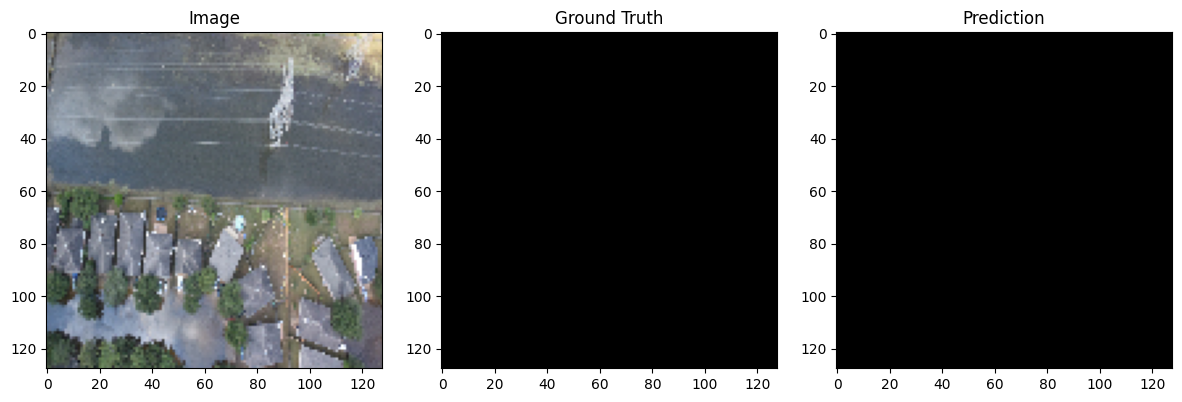

In [ ]:
# ✅ FloodNet Image Segmentation using UNet (Google Colab Ready)

# Step 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Step 2: Set Paths and Constants

# Define BASE_PATH - ensure this matches the path from the kagglehub download
# Use the correct path structure based on previous successful cell executions
BASE_PATH = "/root/.cache/kagglehub/datasets/aletbm/aerial-imagery-dataset-floodnet-challenge/versions/1"

IMAGE_SIZE = (128, 128)
# Set NUM_CLASSES to 2 for binary segmentation (Flooded vs Non-Flooded)
# Based on your mask processing (converting non-zero to 1), you have 2 classes (0 and 1)
NUM_CLASSES = 2

# Correct the IMAGE_DIR and MASK_DIR to use the BASE_PATH
IMAGE_DIR = os.path.join(BASE_PATH, "FloodNet Challenge - Track 2", "Images", "Train_Image")
# Assuming the generated masks are stored here. If you are using the original masks
# from the dataset, adjust MASK_DIR accordingly. Based on cell 61, the original
# mask path is os.path.join(BASE_PATH, "FloodNet Challenge - Track 1", "Train", "Labeled", "Flooded", "mask")
# If you generated masks in /content/generated_masks, use that path.
# Let's assume you want to use the original dataset structure for masks here.
MASK_DIR = os.path.join(BASE_PATH, "FloodNet Challenge - Track 1", "Train", "Labeled", "Flooded", "mask")
# If you are using the generated masks, uncomment the line below and comment the one above:
# MASK_DIR = "/content/generated_masks"


# Step 3: Load and Preprocess Data
def load_dataset(image_dir, mask_dir, image_size):
    images, masks = [], []

    # List image files from the image directory
    if not os.path.isdir(image_dir):
         print(f"Error: Image directory not found: {image_dir}")
         return np.array(images), np.array(masks)

    image_filenames = sorted(os.listdir(image_dir)) # Use sorted for consistency

    print(f"Found {len(image_filenames)} images in {image_dir}")
    print(f"Looking for corresponding masks in {mask_dir}")

    # Iterate through image files and find corresponding masks
    # We need to match the image filename to the mask filename
    # Based on previous matching logic (cell 61), masks are named like image_id_lab.png
    # and images like image_id.JPG

    mask_dict = {}
    if os.path.isdir(mask_dir):
        mask_filenames = os.listdir(mask_dir)
        # Build a dictionary mapping image_id to mask path
        mask_dict = {fname.replace("_lab.png", ""): os.path.join(mask_dir, fname)
                     for fname in mask_filenames if fname.endswith("_lab.png")}
        print(f"Found {len(mask_dict)} potential masks in {mask_dir} based on _lab.png naming.")
    else:
        print(f"Error: Mask directory not found: {mask_dir}")
        return np.array(images), np.array(masks)


    processed_count = 0
    for fname in image_filenames:
        # Get the base filename (image_id) without extension
        img_id, ext = os.path.splitext(fname)

        # Construct the expected mask filename for matching
        # The original masks seem to follow the pattern <image_id>_lab.png
        expected_mask_id = img_id
        mask_path = mask_dict.get(expected_mask_id)


        if mask_path:
            img_path = os.path.join(image_dir, fname)

            try:
                img = load_img(img_path, target_size=image_size)
                img = img_to_array(img) / 255.0

                # Load mask as grayscale (color_mode="grayscale")
                mask = load_img(mask_path, target_size=image_size, color_mode="grayscale")
                mask = img_to_array(mask).astype(np.uint8)
                mask = mask.squeeze() # Remove the channel dimension (H, W, 1) -> (H, W)

                # Ensure mask values are binary (0 or 1) if needed for sparse_categorical_crossentropy
                # Assuming non-zero pixels are the positive class (e.g., flood)
                mask[mask > 0] = 1 # Convert non-zero values (like 255) to 1


                images.append(img)
                masks.append(mask)
                processed_count += 1
            except Exception as e:
                print(f"Warning: Error processing {fname} or its mask: {e}. Skipping.")
        # else:
            # print(f"Debug: No matching mask found for image: {fname} (Looking for ID: {img_id})")


    print(f"Successfully loaded and matched {processed_count} image/mask pairs.")
    # Convert lists to numpy arrays
    images_np = np.array(images)
    masks_np = np.array(masks)

    # Check shapes
    print(f"Loaded images shape: {images_np.shape}")
    print(f"Loaded masks shape: {masks_np.shape}")

    return images_np, masks_np

# Load data using the corrected paths
images, masks = load_dataset(IMAGE_DIR, MASK_DIR, IMAGE_SIZE)

# Check if any data was loaded before splitting
if len(images) == 0:
    print("No images loaded. Cannot proceed with training.")
else:
    X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}") # Should be (num_samples, H, W) for sparse_categorical_crossentropy
    print(f"X_val shape: {X_val.shape}")
    print(f"y_val shape: {y_val.shape}") # Should be (num_samples, H, W)


    # Step 4: Create UNet Model
    def unet_model(input_size=(128,128,3), num_classes=2): # Set num_classes to 2
        inputs = tf.keras.Input(input_size)

        # Encoder
        c1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
        c1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(c1)
        p1 = tf.keras.layers.MaxPooling2D()(c1)

        c2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(p1)
        c2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(c2)
        p2 = tf.keras.layers.MaxPooling2D()(c2)

        c3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(p2)
        c3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(c3)
        p3 = tf.keras.layers.MaxPooling2D()(c3)

        # Bottleneck
        c4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(p3)
        c4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(c4)

        # Decoder
        u5 = tf.keras.layers.Conv2DTranspose(256, 2, strides=2, padding='same')(c4)
        u5 = tf.keras.layers.concatenate([u5, c3])
        c5 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(u5)
        c5 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(c5)

        u6 = tf.keras.layers.Conv2DTranspose(128, 2, strides=2, padding='same')(c5)
        u6 = tf.keras.layers.concatenate([u6, c2])
        c6 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(u6)
        c6 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(c6)

        u7 = tf.keras.layers.Conv2DTranspose(64, 2, strides=2, padding='same')(c6)
        u7 = tf.keras.layers.concatenate([u7, c1])
        c7 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(u7)
        c7 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(c7)

        # Output layer: For binary classification, 2 filters with softmax
        outputs = tf.keras.layers.Conv2D(num_classes, (1, 1), activation='softmax')(c7)

        model = tf.keras.Model(inputs, outputs)
        return model

    # Create model instance
    model = unet_model(input_size=IMAGE_SIZE + (3,), num_classes=NUM_CLASSES) # Pass input size and num_classes

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy with integer masks (0 or 1)
                  metrics=['accuracy'])

    # Step 5: Train the Model
    # Ensure y_train and y_val are integers (0 or 1) and have shape (num_samples, H, W)
    # This is handled in the load_dataset function now.
    model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=16, epochs=20)

    # Step 6: Predict and Evaluate
    def evaluate_model(model, X_val, y_val, num_classes): # Pass num_classes
        print("Predicting on validation data...")
        preds = model.predict(X_val)
        # Convert probability output to class index (0 or 1)
        preds_classes = np.argmax(preds, axis=-1)

        print("\nEvaluating metrics...")
        # Flatten for classification report
        y_val_flat = y_val.flatten()
        preds_flat = preds_classes.flatten()

        # Ensure labels for classification report match the actual classes present in y_val_flat and preds_flat
        # Since we forced masks to be 0 or 1, the labels are [0, 1]
        report_labels = np.arange(num_classes) # Should be [0, 1]

        # Handle cases where a class might not be present in the flattened arrays
        # You can filter labels to only include those present in the data if needed,
        # but using the expected range [0, 1] is generally fine.

        try:
            f1 = f1_score(y_val_flat, preds_flat, average='macro')
            print("\nF1 Score (Macro):", f1) # Use macro average for imbalanced classes

            # classification_report can handle labels not present in y_true or y_pred,
            # but explicitly setting labels can be clearer.
            print("\nClassification Report:\n", classification_report(y_val_flat, preds_flat, labels=report_labels, zero_division=0)) # Add zero_division=0 to avoid warning

        except ValueError as e:
            print(f"Error calculating metrics: {e}")
            print("Unique values in y_val_flat:", np.unique(y_val_flat))
            print("Unique values in preds_flat:", np.unique(preds_flat))


        return preds_classes # Return the predicted class masks

    predicted_masks = evaluate_model(model, X_val, y_val, NUM_CLASSES) # Pass NUM_CLASSES

    # Step 7: Visualize Results
    def visualize_sample(index, X, y_true, y_pred): # Pass X, y_true, y_pred
        if index >= len(X):
            print(f"Index {index} out of bounds for dataset size {len(X)}")
            return

        fig, ax = plt.subplots(1, 3, figsize=(12, 4))

        ax[0].imshow(X[index])
        ax[0].set_title("Image")

        ax[1].imshow(y_true[index], cmap='gray') # y_true is integer mask
        ax[1].set_title("Ground Truth")

        ax[2].imshow(y_pred[index], cmap='gray') # y_pred is integer mask
        ax[2].set_title("Prediction")

        plt.tight_layout()
        plt.show()

    # Visualize a sample from the validation set
    visualize_sample(0, X_val, y_val, predicted_masks)